In [2]:
!pip install fredapi


In [3]:
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight') #theme using for matplotlib
pd.set_option('display.max_columns', 500) # when the data is too wide
col_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
fred_key = '8a81d5aedcfebb8cf146b309dfa1dc02 '

1. Pulling the data by creating a fred object

In [4]:
fred = Fred(api_key = fred_key)

In [5]:
fred

2. Search for economic data

In [6]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [7]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-09-01,2024-09-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-08-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-08-30 08:14:09-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-09-01,2024-09-01,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-08-27 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-09-01,2024-09-01,S&P 500,2014-09-02,2024-08-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-08-30 19:22:19-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-09-01,2024-09-01,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-09-01,2024-09-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-08-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-08-30 08:14:12-05:00,82,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2024-09-01,2024-09-01,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
DDDI01GTA156NWDB,DDDI01GTA156NWDB,2024-09-01,2024-09-01,Private Credit by Deposit Money Banks to GDP f...,1960-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:51-05:00,3,The financial resources provided to the privat...
Q03069USQ605NNBR,Q03069USQ605NNBR,2024-09-01,2024-09-01,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."


In [8]:
sp_search.shape

(1000, 15)

3. Pulling Raw Data

In [9]:
sp500 = fred.get_series(series_id ='SP500')
sp500

,0
2014-09-01,NaN
2014-09-02,2002.28
2014-09-03,2000.72
2014-09-04,1997.65
2014-09-05,2007.71
...,...
2024-08-26,5616.84
2024-08-27,5625.80
2024-08-28,5592.18
2024-08-29,5591.96


<Axes: title={'center': 'S&P500'}>

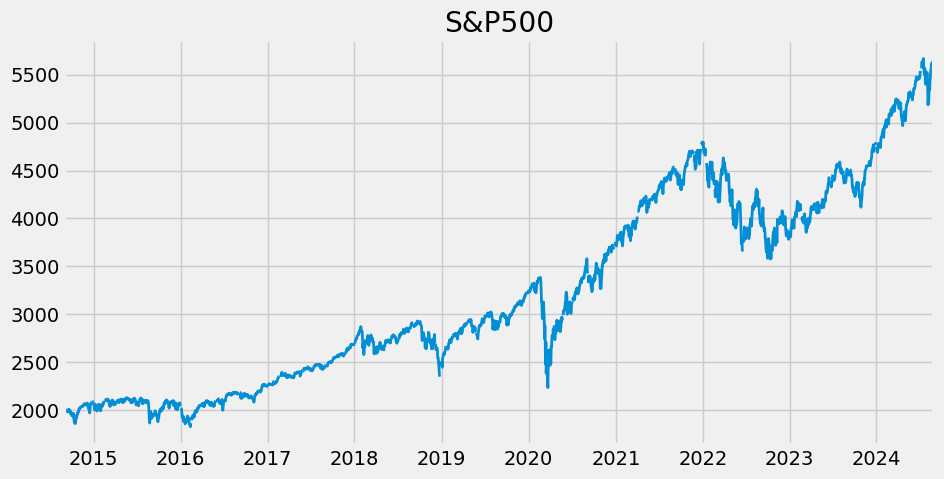

In [10]:
sp500.plot(figsize=(10,5),title = 'S&P500', lw=2)

4. Pulling and Joining Multiple Dataseries

In [11]:
unemp_results = fred.search('unemployment')

In [12]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-01,2024-09-01,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-09-01,2024-09-01,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-08-02 07:46:07-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-09-01,2024-09-01,Unemployment Level,1948-01-01,2024-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-08-02 07:46:03-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-09-01,2024-09-01,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-09-01,2024-09-01,Continued Claims (Insured Unemployment),1967-01-07,2024-08-17,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-08-29 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-09-01,2024-09-01,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-09-01,2024-09-01,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-09-01,2024-09-01,Unemployment Rate - Married Women,1955-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:34-05:00,9,To obtain estimates of women worker employment...


In [13]:
unrate = fred.get_series('UNRATE')

In [14]:
unrate

,0
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-03-01,3.8
2024-04-01,3.9
2024-05-01,4.0
2024-06-01,4.1
